In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("../../../Data/customer.csv")
df

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No
5,31,Female,Average,School,Yes
6,18,Male,Good,School,No
7,60,Female,Poor,School,Yes
8,65,Female,Average,UG,No
9,74,Male,Good,UG,Yes


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40, 4) (10, 4) (40,) (10,)


In [42]:
df['review'].value_counts()

review
Poor       18
Good       18
Average    14
Name: count, dtype: int64

In [43]:
df['education'].value_counts()

education
PG        18
School    16
UG        16
Name: count, dtype: int64

In [44]:
df['purchased'].value_counts()

purchased
No     26
Yes    24
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
X_train_encoded = oe.fit_transform(X_train[['review','education']])
X_test_encoded = oe.transform(X_test[['review','education']])

In [46]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=['review','education'])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=['review','education'])
X_train_encoded

,review,education
0,0.0,0.0
1,1.0,1.0
2,1.0,2.0
3,1.0,1.0
4,2.0,2.0
5,2.0,0.0
6,2.0,2.0
7,0.0,2.0
8,2.0,2.0
9,0.0,1.0


In [47]:
X_train_encoded = np.hstack((X_train[['age','gender']], X_train_encoded))
X_test_encoded = np.hstack((X_test[['age','gender']], X_test_encoded))
X_train_encoded

array([[51, 'Male', 0.0, 0.0],
       [16, 'Female', 1.0, 1.0],
       [94, 'Male', 1.0, 2.0],
       [65, 'Female', 1.0, 1.0],
       [72, 'Female', 2.0, 2.0],
       [18, 'Male', 2.0, 0.0],
       [23, 'Male', 2.0, 2.0],
       [64, 'Female', 0.0, 2.0],
       [38, 'Female', 2.0, 2.0],
       [75, 'Male', 0.0, 1.0],
       [74, 'Male', 2.0, 1.0],
       [59, 'Male', 0.0, 1.0],
       [16, 'Female', 1.0, 2.0],
       [86, 'Male', 1.0, 0.0],
       [22, 'Female', 0.0, 0.0],
       [30, 'Female', 1.0, 0.0],
       [77, 'Female', 1.0, 1.0],
       [69, 'Female', 0.0, 2.0],
       [89, 'Female', 2.0, 2.0],
       [31, 'Female', 1.0, 0.0],
       [83, 'Female', 1.0, 1.0],
       [74, 'Male', 2.0, 1.0],
       [34, 'Female', 2.0, 1.0],
       [68, 'Female', 0.0, 1.0],
       [32, 'Male', 1.0, 2.0],
       [70, 'Female', 2.0, 2.0],
       [27, 'Male', 0.0, 2.0],
       [74, 'Male', 0.0, 0.0],
       [96, 'Female', 2.0, 0.0],
       [39, 'Male', 2.0, 0.0],
       [98, 'Female', 2.0, 1.0],
   

In [51]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=X_test.columns)
X_train_encoded

,age,gender,review,education
0,51,Male,0.0,0.0
1,16,Female,1.0,1.0
2,94,Male,1.0,2.0
3,65,Female,1.0,1.0
4,72,Female,2.0,2.0
5,18,Male,2.0,0.0
6,23,Male,2.0,2.0
7,64,Female,0.0,2.0
8,38,Female,2.0,2.0
9,75,Male,0.0,1.0


# Barchart comparison

<Axes: xlabel='review', ylabel='Count'>

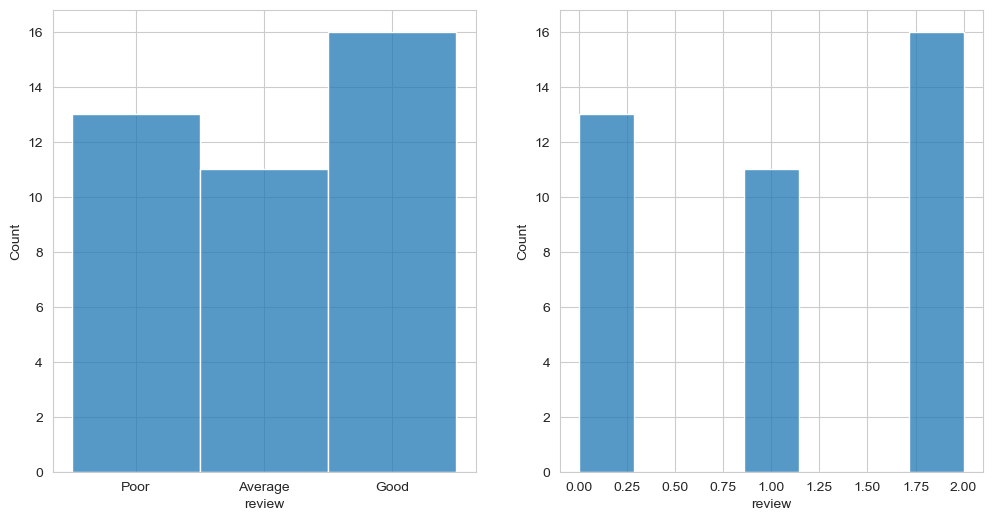

In [52]:
fig , axis = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.histplot(data=X_train,x='review', ax=axis[0])
sns.histplot(data=X_train_encoded,x='review', ax=axis[1])

<Axes: xlabel='education', ylabel='Count'>

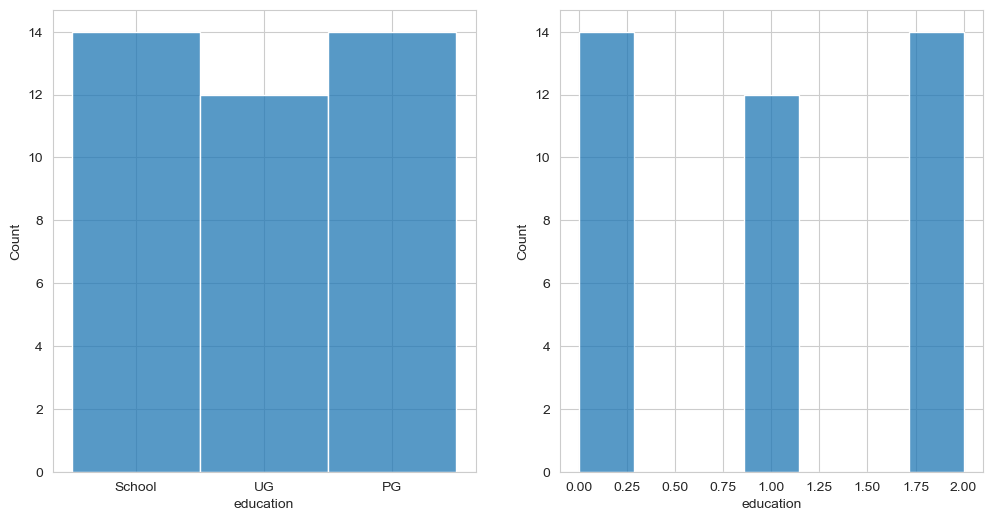

In [53]:
fig , axis = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
sns.histplot(data=X_train,x='education', ax=axis[0])
sns.histplot(data=X_train_encoded,x='education', ax=axis[1])